In [26]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
Nrun = 100
for j in range(Nrun):
    
print(np.random.random())

0.39476647569811163


# Let's start talking about random numbers

# Review of Random Variables

1. Fundamental laws of nature could be stochastic.
   In quantum physics we assume that stochasticity in inherently present in the act of measurement.

2. Deterministic dynamics creates seemingly random behavior.
   This is how pseudorandom number generators work; recall logistic map.   

In [2]:
#Let's start with the chaos() function. This is a pseudorandom number generator.
def chaos():
    print("This program illustrates chaotic behavior.")
    x = eval(input("Enter a number betweek 0 and 1: "))
    for i in range(10):
        x = 3.9 * x * (1-x)
        print(x)

In [3]:
chaos()

This program illustrates chaotic behavior.
Enter a number betweek 0 and 1: 0.2
0.6240000000000001
0.9150335999999998
0.30321373239705673
0.8239731430433209
0.5656614700878645
0.9581854282490118
0.1562578420270518
0.5141811824451928
0.9742156868513789
0.09796598114189214


In [22]:
#Let's plot the numbers
def chaos(x=0.2):
    n=100
    #print("This program illustrates chaotic behavior.")
    #x = eval(input("Enter a number betweek 0 and 1: "))
    a=np.zeros(n)
    for i in range(n):
        x = 3.9 * x * (1-x)
        a[i]=x
        #print(x)
    return a

In [23]:
b=chaos(0.3)
b

array([0.819, 0.578, 0.951, 0.181, 0.578, 0.951, 0.181, 0.579, 0.951,
       0.183, 0.583, 0.948, 0.193, 0.607, 0.931, 0.252, 0.735, 0.76 ,
       0.712, 0.8  , 0.623, 0.916, 0.301, 0.821, 0.573, 0.954, 0.171,
       0.554, 0.964, 0.136, 0.459, 0.968, 0.119, 0.41 , 0.943, 0.208,
       0.643, 0.895, 0.365, 0.904, 0.337, 0.872, 0.436, 0.959, 0.153,
       0.506, 0.975, 0.096, 0.337, 0.871, 0.437, 0.96 , 0.151, 0.501,
       0.975, 0.095, 0.336, 0.87 , 0.442, 0.962, 0.142, 0.476, 0.973,
       0.103, 0.361, 0.899, 0.353, 0.891, 0.379, 0.918, 0.293, 0.808,
       0.606, 0.931, 0.249, 0.729, 0.77 , 0.69 , 0.834, 0.539, 0.969,
       0.117, 0.403, 0.938, 0.225, 0.681, 0.848, 0.504, 0.975, 0.095,
       0.336, 0.87 , 0.441, 0.961, 0.145, 0.485, 0.974, 0.098, 0.346,
       0.883])

Text(0, 0.5, 'b[i]')

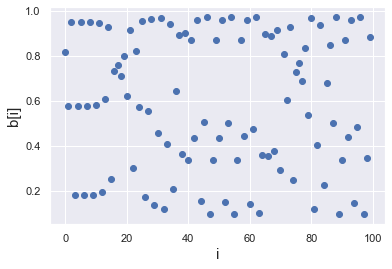

In [27]:
plt.plot(b,'o')
plt.xlabel('i',fontsize=15)
plt.ylabel('b[i]',fontsize=15)

[Text(0, 0.5, 'b[i+1]')]

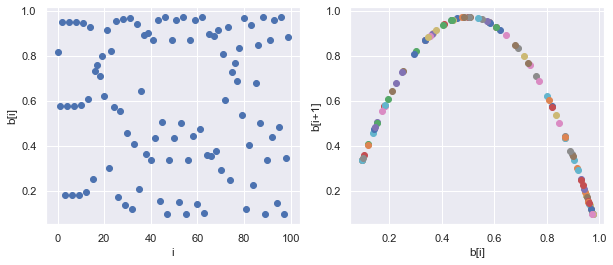

In [48]:
#However, a plot of consecutive elements can reveal how bad a random number generator is.

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,4))
ax1.plot(b,'o')
ax1.set(xlabel='i')
ax1.set(ylabel='b[i]')

for i in range(99):
    ax2.scatter(b[i],b[i+1])
    
ax2.set(xlabel='b[i]')
ax2.set(ylabel='b[i+1]')
    
    


[Text(0, 0.5, 'rf[i+1]')]

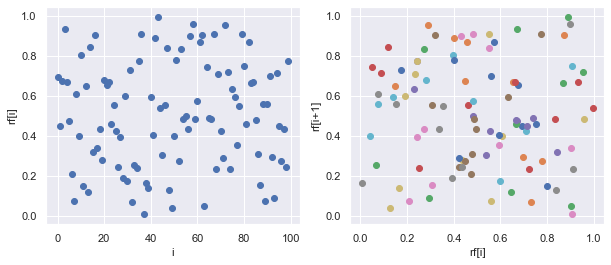

In [49]:
#NumPy does much better job

rf = np.random.rand(100)
rf

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(10,4))
ax1.plot(rf,'o')
ax1.set(xlabel='i')
ax1.set(ylabel='rf[i]')

for i in range(99):
    ax2.scatter(rf[i],rf[i+1])
    
ax2.set(xlabel='rf[i]')
ax2.set(ylabel='rf[i+1]')

In [65]:
# Let's see an example of uniformly distributed (Law of large numbers)
#The random number generator does not favor any of the values
#What is the probability that I get 3, for example.

ri = np.random.randint(0, 10, 100) #let's try 100, 1000, 100000, 1000000
ri

array([4, 6, 2, 6, 0, 6, 0, 6, 2, 4, 8, 6, 5, 0, 5, 2, 4, 0, 3, 4, 2, 7,
       5, 0, 0, 5, 2, 8, 2, 7, 3, 5, 9, 4, 2, 0, 3, 4, 3, 9, 4, 6, 8, 4,
       8, 5, 3, 9, 9, 8, 2, 4, 0, 9, 8, 3, 7, 2, 5, 3, 6, 1, 3, 1, 7, 3,
       6, 6, 7, 4, 1, 7, 2, 6, 4, 2, 2, 7, 2, 1, 9, 0, 5, 6, 6, 5, 3, 8,
       2, 0, 3, 2, 0, 1, 3, 9, 2, 2, 8, 1])

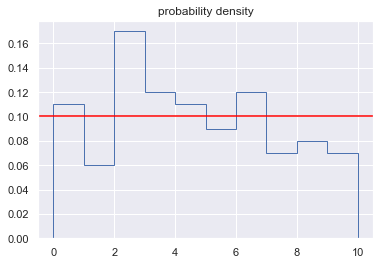

In [66]:
plt.hist(ri, bins = np.arange(11), histtype='step', density=True)
plt.title('probability density')
plt.axhline(y=0.1, color='red');

# Random walk
Let's try another example, before we get into the theory.

Let's have a random walker along the x-axis:

    1. The start is at x=0.
    2. At each time-step (say each second), moves left or right, with equal probability p=0.5. 
    

Text(0, 0.5, 'Position')

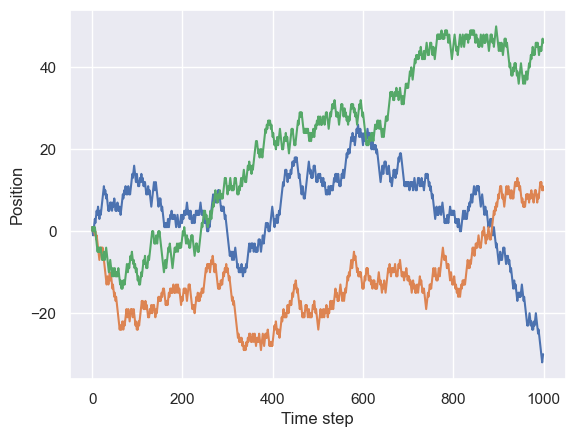

In [14]:
#Let's do a single random walk first
Nruns=3
Nsteps=1000
final_position=np.zeros(Nruns)
#Loop over several walks
for j in range(Nruns):
    position=np.zeros(Nsteps)
    position[0]=0.0
    #Loop over the steps of a single walk
    for i in range(Nsteps):
        if np.random.random()>0.5:  #Here, in the if-else statement, I flip a coin.
            position[i]=position[i-1]+1
        else:
            position[i]=position[i-1]-1
    final_position[j]=position[Nsteps-1]
    plt.plot(position)

plt.xlabel(xlabel='Time step')
plt.ylabel(ylabel='Position')

#plt.plot(Nsteps+np.zeros(Nruns),final_position,'o')    
#plt.hist(final_position, density=True,bins=10)
#np.mean(final_position)

(array([0.001, 0.007, 0.022, 0.362, 0.127, 0.085, 0.017, 0.003, 0.001,
        0.001]),
 array([-6. , -4.4, -2.8, -1.2,  0.4,  2. ,  3.6,  5.2,  6.8,  8.4, 10. ]),
 <BarContainer object of 10 artists>)

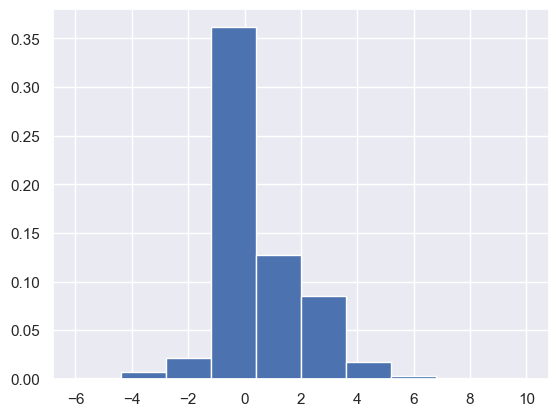

In [28]:
#What's the distribution of positions in a single random walk?
Nruns=1000
Nsteps=1000
final_position=np.zeros(Nruns)
#Loop over several walks
for j in range(Nruns):
    position=np.zeros(Nsteps)
    position[0]=0.0
    #Loop over the steps of a single walk
    for i in range(Nsteps):
        if 0< np.random.random()< 0.333:  #Here, in the if-else statement, I flip a coin.
            position[i]=position[i-1]+1
        elif 0.333< np.random.random()< 0.667:
            position[i]=position[i-1]-1
            
        elif np.random.random()>0.667:
            position[i]=position[i-1]
            
    final_position[j]=position[Nsteps-1]

#fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

#ax1.plot(position)
#ax1.set(xlabel='Time step')
#ax1.set(ylabel='Position')

#ax2.hist(position)
#ax2.set(xlabel='Position')
#ax2.set(ylabel='Frequency')

#plt.plot(Nsteps+np.zeros(Nruns),final_position,'o')    
plt.hist(final_position, density=True,bins=10)
#np.mean(final_position)

(array([2.800e-05, 3.440e-04, 1.864e-03, 5.644e-03, 1.156e-02, 1.136e-02,
        6.796e-03, 1.996e-03, 3.760e-04, 2.800e-05]),
 array([-126., -101.,  -76.,  -51.,  -26.,   -1.,   24.,   49.,   74.,
          99.,  124.]),
 <BarContainer object of 10 artists>)

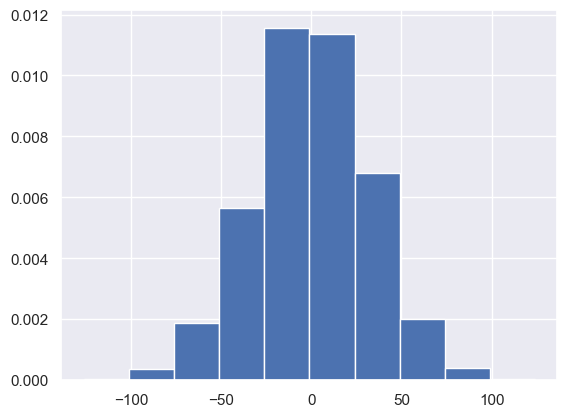

In [19]:
#What is the distribution of the final points of many random walks
Nruns=10000
Nsteps=1000
final_position=np.zeros(Nruns)
for j in range(Nruns):
    position=np.zeros(Nsteps)
    position[0]=0.0
    for i in range(Nsteps):
        if np.random.random()>0.5:
            position[i]=position[i-1]+1
        else:
            position[i]=position[i-1]-1
    final_position[j]=position[Nsteps-1]

#plt.plot(final_position)    
plt.hist(final_position, density=True,bins=10)
#np.mean(final_position)

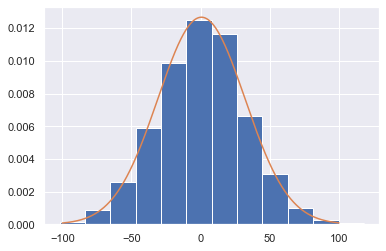

In [87]:
#Let's calculate the meand and standard deviation (measure of the width) of the histogram above,
#and plot a gaussian function on top of he histogram
plt.hist(final_position, density=True,bins=12)
avrg=np.mean(final_position)
sd=np.std(final_position)
x=np.linspace(-100,100,2000)
y=np.exp(-0.5*(x-avrg)**2/sd**2)/(sd*np.sqrt(2*np.pi))
plt.plot(x,y)

Let's do several random walks, and calculate the means of the final positions for several final times.

We will also calculate the standard deviations, i.e. the width of the distribution, 
and the mean of the squares of the final positions.

Standard notation:

Mean of $x$: $<x>$

Standard deviation of $x$: $\sigma_x$

Mean of $x^2$: $<x^2>$

We will plot these values as functions of the final times.

In [21]:

means=np.zeros(11)
stds=np.zeros(11)
mean_sqs=np.zeros(11)
steps=np.array(range(10,120,10))  #these are the values of the final times: 10, 20, 30... 110.
for Nsteps in range(10,100,10):
    Nruns=1000
    final_position=np.zeros(Nruns)
    for j in range(Nruns):
        position=np.zeros(Nsteps)
        position[0]=0.0
        for i in range(Nsteps):
            if np.random.random()>0.5:
                position[i]=position[i-1]+1
            else:
                position[i]=position[i-1]-1
        final_position[j]=position[Nsteps-1]
        
    #plt.hist(final_position, density=True,bins=10)
    means[int(Nsteps/10)]=np.mean(final_position)
    stds[int(Nsteps/10)]=np.std(final_position)
    mean_sqs[int(Nsteps/10)]=np.mean(final_position**2)


In [90]:
steps

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [91]:
means

array([ 0.   ,  0.148, -0.162, -0.194, -0.194,  0.24 ,  0.094,  0.1  ,
       -0.142, -0.036,  0.   ])

Text(0, 0.5, 'Mean position $<x>$')

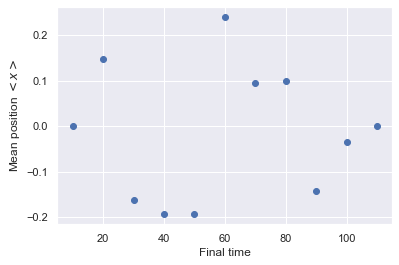

In [110]:
plt.scatter(steps,means)
plt.xlabel(xlabel='Final time')
plt.ylabel(ylabel='Mean position $<x>$')


Text(0, 0.5, '$\\sigma_x^2$')

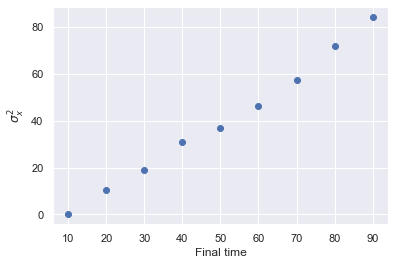

In [106]:
plt.scatter(steps[:9],stds[0:9]**2)
plt.xlabel(xlabel='Final time')
plt.ylabel(ylabel='$\sigma_x^2$')


Text(0, 0.5, '$<x^2>$')

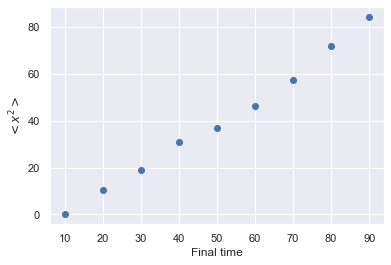

In [109]:
plt.scatter(steps[:9],mean_sqs[0:9])
plt.xlabel(xlabel='Final time')
plt.ylabel(ylabel='$<x^2>$')


So for random walks the position is not proportional to the time of travel. 
The average square of the position is proportional to the time.

This fact was discovered by none other than Albert Einstein. Published during his "Annus Mirabilis", in 1905, alongside with the Theory of Relativity and Photoeffect (fundamentals of Quantum mechanics) papers. 

https://physicsworld.com/a/einsteins-random-walk/

He found the connection between random walks, Brownian motion and diffusion. 

$<X^2>=\frac{k_B T}{6\pi \eta R} t$

where $X$ is the displacement, $T$ is the temperature, $k_B$ is the Boltzmann constant, $\eta$ is the viscosity of the liquid, $R$ is the size of the particle, and $t$ is the time. 

If you put a drop of ink in water, it will spread with a gaussian density profile. The square of the width of the gaussian will be proportional to the time.

https://youtu.be/GXGfS0XA_Hg

Another interesting fact is, that a random walk trajectory has no derivatives. It is not "smooth" (or not analytical). The concept of velocity for particle that performs a random walk is not well defined. 



